# Predicting House Sale Prices

This project will utilize the linear regression model in machine learning to predicting house price for city of Ames, Iowa US. Housing data for city of Ames, Iowa, US from 2006 to 2010.

In [67]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [68]:
# Read data
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [69]:
def transform_features(df):        
    return df

In [70]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [71]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Select numerical features
    num_train = train.select_dtypes(include=['integer', 'float'])
    num_test = test.select_dtypes(include=['integer', 'float'])
    
    # Features
    features = num_train.columns.drop('SalePrice')
   
    # Train dat with LinearRegression
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    prediction = lr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test['SalePrice'], prediction))
    return rmse

In [72]:
transform_df = transform_features(df)
feature_df = select_features(transform_df)
rmse = train_and_test(feature_df)
rmse

57088.25161263909

## Feature Transformation
- Remove features with > 5% missing values.
    - If less than 5% fill with mode value.
- Remove features with leaking sale info.
- Transform text features and scaling numerical features.
- Create new features if needed. 

1. Drop columns with more than 5% missing values.
2. Fill in mode value if less than 5% missing values.

In [73]:
col_names = list(df.columns.values)
for col in col_names:
    if (df[col].isnull().sum()/len(df[col])) > 0.05:
        df = df.drop([col], axis = 1)        
    elif (df[col].isnull().sum()) > 0:
        fill_value = df[col].mode(dropna = True)[0]
        df[col] = df[col].fillna(fill_value)

In [8]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Utilities        2930 non-null   object 
 9   Lot Config       2930 non-null   object 
 10  Land Slope       2930 non-null   object 
 11  Neighborhood     2930 non-null   object 
 12  Condition 1      2930 non-null   object 
 13  Condition 2      2930 non-null   object 
 14  Bldg Type        2930 non-null   object 
 15  House Style      2930 non-null   object 
 16  Overall Qual     2930 non-null   int64  
 17  Overall Cond  

3. Combine new old features for new features.
    - Property age = Year sold - Year built
    - Remodeled age = Year sold - Year remod/add
    - Years_until_remod = Year remod/add - Year built

In [74]:
df['Property Age'] = df['Yr Sold'] - df['Year Built']
df['Remod Age'] = df['Yr Sold'] - df['Year Remod/Add']
df['Years_until_remod'] = df['Year Remod/Add'] - df['Year Built']

In [76]:
sorted(df['Property Age'].unique())

[-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 117,
 118,
 119,
 120,
 122,
 125,
 126,
 127,
 128,
 129,
 135,
 136]

In [12]:
df['Remod Age'].unique()

array([50, 49, 52, 42, 12,  9, 18, 14, 11, 16,  3, 20, 25,  7,  5,  0, 59,
       22, 33, 36, 10, 40,  2, 39, 35, 32,  4,  6,  8, 15,  1, 30, 31, 26,
       29, 60, 43, 47, 17, 44, 51, 46, 56, 38, 21, 53, 54, 58, 55, 48, 13,
       45, 41, 23, 34, 19, 37, 24, 28, 27, 57, -1, -2], dtype=int64)

In [13]:
df['Years_until_remod'].unique()

array([  0,   1,  15,  17,  10,  37,   8,  30,  34,  44,  48,  28,  29,
        24,  39,  46,  50,  26,  42,  19,  36,   6,  54,  74,  52,  49,
         2,  47,  40,  56,  35,  21,  94,  23,   5,  72,  62,  61,  75,
       103, 112,  65,  83,  25,  11,  20,  27,  97,  73,  96,  33,  43,
       121,  45,  14,  32,  60,  93,   9,  71,  41,  13,  38,  85,  12,
        22,  31,  55,  57,  87,  53,  70,  51,  67,  82,  98, 108,   7,
        78,  63,  92,  58,  88,   3, 123,  90, 104,  68, 106,  81,  79,
        16,   4,  59, 127,  -1,  80,  84,  77,  18, 100,  86, 122,  95,
       115, 107, 109,  89,  69,  66, 116, 110,  76,  64, 111, 105, 101],
      dtype=int64)

In [14]:
df[df['Property Age'] < 0]

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Property Age,Remod Age,Years_until_remod
2180,2181,908154195,20,RL,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,17000,10,2007,New,Partial,183850,-1,-2,1


In [15]:
df[df['Remod Age'] < 0]

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Property Age,Remod Age,Years_until_remod
1702,1703,528120010,60,RL,16659,Pave,IR1,Lvl,AllPub,Corner,...,0,0,6,2007,New,Partial,260116,0,-1,1
2180,2181,908154195,20,RL,39290,Pave,IR1,Bnk,AllPub,Inside,...,0,17000,10,2007,New,Partial,183850,-1,-2,1
2181,2182,908154205,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,...,0,0,10,2007,New,Partial,184750,0,-1,1


In [16]:
df[df['Years_until_remod'] < 0]

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Property Age,Remod Age,Years_until_remod
850,851,907194160,20,RL,10739,Pave,IR1,Lvl,AllPub,Inside,...,0,0,4,2009,WD,Normal,203000,7,8,-1


- Remove properties with wrong age, remod age, and remod after sold.

In [17]:
df = df.drop([850, 1702, 2180, 2181], axis = 0)

In [18]:
df[df['Property Age'] < 0]

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Property Age,Remod Age,Years_until_remod


4. Transform text features into categorical data type.

In [19]:
text_cols = df.select_dtypes(include = ['object']).columns

for col in text_cols:
    df[col] = df[col].astype('category')

In [20]:
# Transform MS SubClass to category
df['MS SubClass'] = df[col].astype('category')

5. Scaling numerical features into range 0 to 1 (normalization).

In [21]:
numeric_cols = df.select_dtypes(include = ['integer', 'float']).columns
numeric_cols = numeric_cols.drop(['Order', 'PID', 'Year Built', 'Year Remod/Add', 'Yr Sold', 'SalePrice'])

for col in numeric_cols:
    df[col] = (df[col] - min(df[col]))/(max(df[col]) - min(df[col]))

In [22]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Property Age,Remod Age,Years_until_remod
0,1,526301100,Normal,RL,0.142420,Pave,IR1,Lvl,AllPub,Corner,...,0.0,0.000000,0.363636,2010,WD,Normal,215000,0.367647,0.833333,0.000000
1,2,526350040,Normal,RH,0.048246,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.000000,0.454545,2010,WD,Normal,105000,0.360294,0.816667,0.000000
2,3,526351010,Normal,RL,0.060609,Pave,IR1,Lvl,AllPub,Corner,...,0.0,0.806452,0.454545,2010,WD,Normal,172000,0.382353,0.866667,0.000000
3,4,526353030,Normal,RL,0.046087,Pave,Reg,Lvl,AllPub,Corner,...,0.0,0.000000,0.272727,2010,WD,Normal,244000,0.308824,0.700000,0.000000
4,5,527105010,Normal,RL,0.058566,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.000000,0.181818,2010,WD,Normal,189900,0.095588,0.200000,0.007874


6. Remove features leaking final sale info and not useful features.

In [23]:
sale_info = ['Order', 'PID', 'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition']
df = df.drop(sale_info, axis = 1)

In [24]:
df.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Property Age,Remod Age,Years_until_remod
0,Normal,RL,0.142420,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0.083558,0.0,0.0,0.000000,0.0,0.000000,215000,0.367647,0.833333,0.000000
1,Normal,RH,0.048246,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0.000000,0.0,0.0,0.208333,0.0,0.000000,105000,0.360294,0.816667,0.000000
2,Normal,RL,0.060609,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0.048518,0.0,0.0,0.000000,0.0,0.806452,172000,0.382353,0.866667,0.000000
3,Normal,RL,0.046087,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,244000,0.308824,0.700000,0.000000
4,Normal,RL,0.058566,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0.045822,0.0,0.0,0.000000,0.0,0.000000,189900,0.095588,0.200000,0.007874


### Update transform_features()

In [25]:
def transform_features(df): 
    # Drop columns with > 5% missing value and fillna with mode value for < 5% missing value columns
    col_names = list(df.columns.values)
    for col in col_names:
        if (df[col].isnull().sum()/len(df[col])) > 0.05:
            df = df.drop([col], axis = 1)        
        elif df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode(dropna = True)[0], inplace=True)
    
    # Create new features
    df['Property Age'] = df['Yr Sold'] - df['Year Built']
    df['Remod Age'] = df['Yr Sold'] - df['Year Remod/Add']
    df['Years_until_remod'] = df['Year Remod/Add'] - df['Year Built']
    
    # Drop negative values in new features
    df = df.drop([850, 1702, 2180, 2181], axis = 0)
    
    # Transform text features into categorical features
    text_cols = df.select_dtypes(include = ['object']).columns

    for col in text_cols:
        df[col] = df[col].astype('category')
        
    # Transform MS SubClass to category
    df['MS SubClass'] = df[col].astype('category')
    
    # Normalize numerical features into range 0 to 1
    numeric_cols = df.select_dtypes(include = ['integer', 'float']).columns
    numeric_cols = numeric_cols.drop(['Order', 'PID', 'Year Built', 'Year Remod/Add', 'Yr Sold', 'SalePrice'])

    for col in numeric_cols:
        df[col] = (df[col] - min(df[col]))/(max(df[col]) - min(df[col]))   
    
    # Remove unuseful columns for ML
    sale_info = ['Order', 'PID', 'Mo Sold', 'Yr Sold', 'Year Built', 'Year Remod/Add', 'Sale Type', 'Sale Condition']
    df = df.drop(sale_info, axis = 1)

    return df

In [26]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Select numerical features
    num_train = train.select_dtypes(include=['integer', 'float'])
    num_test = test.select_dtypes(include=['integer', 'float'])
    
    # Features
    features = num_train.columns.drop('SalePrice')
   
    # Train dat with LinearRegression
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    prediction = lr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test['SalePrice'], prediction))
    return rmse

In [27]:
df = pd.read_csv('AmesHousing.tsv', delimiter='\t')
transform_df = transform_features(df)
feature_df = select_features(transform_df)
rmse = train_and_test(feature_df)
rmse

55284.62277814025

## Feature Selection
- Generate correlation heatmap matrix.
- Convert nominal columns to categorial.
- Dummy code categorical columns.
- Update select_features() function.

1. Correlation Heatmap with only nemerical columns.

In [28]:
numerical_df = transform_df.select_dtypes(include = ['integer', 'float'])
corr = numerical_df.corr()
sorted_corrs = corr['SalePrice'].abs().sort_values()
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
corrmat = transform_df[strong_corrs.index].corr()
corrmat

,Open Porch SF,Wood Deck SF,BsmtFin SF 1,Fireplaces,TotRms AbvGrd,Mas Vnr Area,Remod Age,Full Bath,Property Age,1st Flr SF,Garage Area,Total Bsmt SF,Garage Cars,Gr Liv Area,Overall Qual,SalePrice
Open Porch SF,1.000000,0.031488,0.105375,0.155342,0.222806,0.123389,-0.241457,0.255434,-0.196167,0.212991,0.225022,0.222824,0.200455,0.321767,0.290598,0.316277
Wood Deck SF,0.031488,1.000000,0.216457,0.226310,0.148653,0.158774,-0.216862,0.178604,-0.227633,0.218832,0.234643,0.222510,0.239634,0.244307,0.253056,0.328158
BsmtFin SF 1,0.105375,0.216457,1.000000,0.294682,0.030531,0.284582,-0.148090,0.073365,-0.277667,0.439487,0.303704,0.522592,0.252887,0.188418,0.278050,0.439365
Fireplaces,0.155342,0.226310,0.294682,1.000000,0.300359,0.267431,-0.132898,0.229330,-0.169968,0.407300,0.292503,0.332291,0.320191,0.455719,0.391893,0.474994
TotRms AbvGrd,0.222806,0.148653,0.030531,0.300359,1.000000,0.267315,-0.197410,0.528785,-0.110356,0.377196,0.322291,0.266543,0.353531,0.806094,0.376292,0.498614
Mas Vnr Area,0.123389,0.158774,0.284582,0.267431,0.267315,1.000000,-0.190887,0.252396,-0.306276,0.376290,0.365834,0.378653,0.354780,0.387352,0.419045,0.507010
Remod Age,-0.241457,-0.216862,-0.148090,-0.132898,-0.197410,-0.190887,1.000000,-0.456758,0.612699,-0.241679,-0.374983,-0.298472,-0.426103,-0.317837,-0.570161,-0.534972
Full Bath,0.255434,0.178604,0.073365,0.229330,0.528785,0.252396,-0.456758,1.000000,-0.468034,0.372712,0.405161,0.324783,0.477313,0.633452,0.520860,0.546108
Property Age,-0.196167,-0.227633,-0.277667,-0.169968,-0.110356,-0.306276,0.612699,-0.468034,1.000000,-0.310733,-0.479464,-0.409036,-0.536609,-0.240444,-0.596283,-0.558984
1st Flr SF,0.212991,0.218832,0.439487,0.407300,0.377196,0.376290,-0.241679,0.372712,-0.310733,1.000000,0.488545,0.792182,0.440973,0.547023,0.474803,0.635183


[Text(0.5, 0, 'Open Porch SF'),
 Text(1.5, 0, 'Wood Deck SF'),
 Text(2.5, 0, 'BsmtFin SF 1'),
 Text(3.5, 0, 'Fireplaces'),
 Text(4.5, 0, 'TotRms AbvGrd'),
 Text(5.5, 0, 'Mas Vnr Area'),
 Text(6.5, 0, 'Remod Age'),
 Text(7.5, 0, 'Full Bath'),
 Text(8.5, 0, 'Property Age'),
 Text(9.5, 0, '1st Flr SF'),
 Text(10.5, 0, 'Garage Area'),
 Text(11.5, 0, 'Total Bsmt SF'),
 Text(12.5, 0, 'Garage Cars'),
 Text(13.5, 0, 'Gr Liv Area'),
 Text(14.5, 0, 'Overall Qual'),
 Text(15.5, 0, 'SalePrice')]

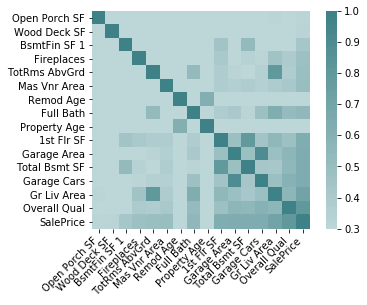

In [29]:
ax = sns.heatmap(corrmat, vmin = 0.3, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 200, n=200), square = True)
# x = sns.heatmap(corrmat, vmin = 0, vmax = 1, center = 0, square = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

2. Drop columns with corr < 0.3

In [30]:
transform_df = transform_df.drop(sorted_corrs[sorted_corrs < 0.3].index, axis=1)
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2929
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MS SubClass     2926 non-null   category
 1   MS Zoning       2926 non-null   category
 2   Street          2926 non-null   category
 3   Lot Shape       2926 non-null   category
 4   Land Contour    2926 non-null   category
 5   Utilities       2926 non-null   category
 6   Lot Config      2926 non-null   category
 7   Land Slope      2926 non-null   category
 8   Neighborhood    2926 non-null   category
 9   Condition 1     2926 non-null   category
 10  Condition 2     2926 non-null   category
 11  Bldg Type       2926 non-null   category
 12  House Style     2926 non-null   category
 13  Overall Qual    2926 non-null   float64 
 14  Roof Style      2926 non-null   category
 15  Roof Matl       2926 non-null   category
 16  Exterior 1st    2926 non-null   category
 17  Exterior 2nd  

Now let's deal with categorical variables. <br>
Firstly, select possible categorical variables and their column labels.

In [31]:
transform_df_cat = transform_df.select_dtypes(include = ['category'])
cat_cols = transform_df_cat.columns
cat_cols

Index(['MS SubClass', 'MS Zoning', 'Street', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Paved Drive'],
      dtype='object')

Secondly, check unique categories in the text variables. If > threshold (such as 10 categories), the variable is dropped.

In [32]:
uniqueness_count = transform_df_cat[cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

# Drop columns with >10 categories
drop_col = uniqueness_count[uniqueness_count > 10].index
transform_df_cat = transform_df_cat.drop(drop_col, axis = 1)
transform_df = transform_df.drop(drop_col, axis=1)

Thirdly, drop columns with low variations, i.e. 95% values belong to a specific category.

In [33]:
variation_col = transform_df_cat.columns
variation_count = transform_df_cat[variation_col].apply(lambda col: (col.value_counts().max())/len(col)). sort_values()
drop_col2 = variation_count[variation_count > 0.95].index
transform_df_cat = transform_df_cat.drop(drop_col2, axis = 1) 
transform_df = transform_df.drop(drop_col2, axis = 1)

In [34]:
cat_cols = transform_df_cat.columns
print(cat_cols)

Index(['MS SubClass', 'MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config',
       'Condition 1', 'Bldg Type', 'House Style', 'Roof Style', 'Mas Vnr Type',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Paved Drive'],
      dtype='object')


In [35]:
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2926 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   MS SubClass     2926 non-null   category
 1   MS Zoning       2926 non-null   category
 2   Lot Shape       2926 non-null   category
 3   Land Contour    2926 non-null   category
 4   Lot Config      2926 non-null   category
 5   Condition 1     2926 non-null   category
 6   Bldg Type       2926 non-null   category
 7   House Style     2926 non-null   category
 8   Overall Qual    2926 non-null   float64 
 9   Roof Style      2926 non-null   category
 10  Mas Vnr Type    2926 non-null   category
 11  Mas Vnr Area    2926 non-null   float64 
 12  Exter Qual      2926 non-null   category
 13  Exter Cond      2926 non-null   category
 14  Foundation      2926 non-null   category
 15  Bsmt Qual       2926 non-null   category
 16  Bsmt Cond       2926 non-null   category
 17  Bsmt Exposure 

Lastly, convert remaining categorical variables to dummy columns and delete original columns.

In [36]:
transform_df = pd.concat([transform_df, pd.get_dummies(transform_df_cat)], axis=1).drop(cat_cols, axis=1)
transform_df.head()

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,0.555556,0.0700,0.113218,0.176759,0.303350,0.249058,0.25,0.416667,0.50,0.4,...,0,0,0,0,0,0,1,0,1,0
1,0.444444,0.0000,0.082920,0.144354,0.128958,0.105878,0.25,0.250000,0.00,0.2,...,0,0,0,0,0,0,1,0,0,1
2,0.555556,0.0675,0.163536,0.217512,0.228316,0.187453,0.25,0.333333,0.00,0.2,...,0,0,0,0,0,0,1,0,0,1
3,0.666667,0.0000,0.188696,0.345336,0.407526,0.334589,0.50,0.500000,0.50,0.4,...,0,0,0,0,0,0,1,0,0,1
4,0.444444,0.0000,0.140149,0.151882,0.136301,0.243971,0.50,0.333333,0.25,0.4,...,0,0,0,0,0,0,1,0,0,1


In [37]:
transform_df.isnull().sum()

Overall Qual      0
Mas Vnr Area      0
BsmtFin SF 1      0
Total Bsmt SF     0
1st Flr SF        0
                 ..
Functional_Sev    0
Functional_Typ    0
Paved Drive_N     0
Paved Drive_P     0
Paved Drive_Y     0
Length: 144, dtype: int64

### Update select_features() Function

In [38]:
def transform_features(df): 
    # Drop object columns with missing value    
    df_obj_col = df.select_dtypes(include = ['object']).columns
    
    for col in df_obj_col:
        if df[col].isnull().sum() > 0:
            df = df.drop([col], axis=1)
    
    # Drop columns with > 5% missing value and fillna with mode value for < 5% missing value columns
    col_names = list(df.columns.values)
    for col in col_names:
        if (df[col].isnull().sum()/len(df[col])) > 0.05:
            df = df.drop([col], axis = 1)        
        elif df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode(dropna = True)[0], inplace=True)
            
    # Create new features
    df['Property Age'] = df['Yr Sold'] - df['Year Built']
    df['Remod Age'] = df['Yr Sold'] - df['Year Remod/Add']
    df['Years_until_remod'] = df['Year Remod/Add'] - df['Year Built']
    
    # Drop negative values in new features
    df = df.drop([850, 1702, 2180, 2181], axis = 0)
    
    # Transform text features into categorical features
    text_cols = df.select_dtypes(include = ['object']).columns

    for col in text_cols:
        df[col] = df[col].astype('category')
        
    # Transform MS SubClass to category
    df['MS SubClass'] = df[col].astype('category')
    
    # Normalize numerical features into range 0 to 1
    numeric_cols = df.select_dtypes(include = ['integer', 'float']).columns
    numeric_cols = numeric_cols.drop(['Order', 'PID', 'Year Built', 'Year Remod/Add', 'Yr Sold', 'SalePrice'])

#     for col in numeric_cols:
#         df[col] = (df[col] - min(df[col]))/(max(df[col]) - min(df[col]))   
    
    # Remove unuseful columns for ML
    sale_info = ['Order', 'PID', 'Mo Sold', 'Yr Sold', 'Year Built', 'Year Remod/Add', 'Sale Type', 'Sale Condition']
    df = df.drop(sale_info, axis = 1)
    return df

def select_features(df, cr=0.3, threshold=10):
    # Numerical variables
    numerical_df = df.select_dtypes(include = ['integer', 'float'])
    corr = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(corr[corr < cr].index, axis=1)
    
    # Categorical variables
    df_cat = df.select_dtypes(include = ['category'])
    cat_cols = df_cat.columns
    uniqueness_count = df_cat[cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_col = uniqueness_count[uniqueness_count > threshold].index
    df_cat = df_cat.drop(drop_col, axis = 1)
    df = df.drop(drop_col, axis=1)
    
    variation_col = df_cat.columns
    variation_count = df_cat[variation_col].apply(lambda col: (col.value_counts().max())/len(col)). sort_values()
    drop_col2 = variation_count[variation_count > 0.95].index
    df_cat = df_cat.drop(drop_col2, axis = 1) 
    df = df.drop(drop_col2, axis = 1)
    
    # Convert the rest categorial variables to dummy codes and remove original columns
    cat_cols = df_cat.columns
    df = pd.concat([df, pd.get_dummies(df_cat)], axis=1).drop(cat_cols, axis=1)   
    return df

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    # Select numerical features
    num_train = train.select_dtypes(include=['integer', 'float'])
    num_test = test.select_dtypes(include=['integer', 'float'])
    
    # Features
    features = num_train.columns.drop('SalePrice')
   
    # Train dat with LinearRegression
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    prediction = lr.predict(test[features])
    rmse = np.sqrt(mean_squared_error(test['SalePrice'], prediction))
    return rmse

In [39]:
df = pd.read_csv('AmesHousing.tsv', delimiter='\t')
transform_df = transform_features(df)
feature_df = select_features(transform_df, cr=0.3, threshold=10)
rmse = train_and_test(feature_df)
rmse

32668.38163649114

### Update train_and_test() Function 
- Add optional k parameter for k-fold validation.
    - When k = 0, perform holdout validation (50% train 50% test).
    - When k = 1, perform simple cross validation.
        - Shuffle row orders, first half rows is fold_one, remaining is fold_two.
        - Train on fold_one, test on fold_two.
        - Train on fold_two, test on fold_one.
        - Return averaged RMSE.
    - When k > 1, perform k-fold cross validation.

In [46]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [61]:
def transform_features(df): 
    # Drop object columns with missing value    
    df_obj_col = df.select_dtypes(include = ['object']).columns
    
    for col in df_obj_col:
        if df[col].isnull().sum() > 0:
            df = df.drop([col], axis=1)
    
    # Drop columns with > 5% missing value and fillna with mode value for < 5% missing value columns
    col_names = list(df.columns.values)
    for col in col_names:
        if (df[col].isnull().sum()/len(df[col])) > 0.05:
            df = df.drop([col], axis = 1)        
        elif df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mode(dropna = True)[0], inplace=True)
            
    # Create new features
    df['Property Age'] = df['Yr Sold'] - df['Year Built']
    df['Remod Age'] = df['Yr Sold'] - df['Year Remod/Add']
    df['Years_until_remod'] = df['Year Remod/Add'] - df['Year Built']
    
    # Drop negative values in new features
    df = df.drop([850, 1702, 2180, 2181], axis = 0)
    
    # Transform text features into categorical features
    text_cols = df.select_dtypes(include = ['object']).columns

    for col in text_cols:
        df[col] = df[col].astype('category')
        
    # Transform MS SubClass to category
    df['MS SubClass'] = df[col].astype('category')
    
    # Normalize numerical features into range 0 to 1
    numeric_cols = df.select_dtypes(include = ['integer', 'float']).columns
    numeric_cols = numeric_cols.drop(['Order', 'PID', 'Year Built', 'Year Remod/Add', 'Yr Sold', 'SalePrice'])
 
    # Remove unuseful columns for ML
    sale_info = ['Order', 'PID', 'Mo Sold', 'Yr Sold', 'Year Built', 'Year Remod/Add', 'Sale Type', 'Sale Condition']
    df = df.drop(sale_info, axis = 1)
    return df

def select_features(df, cr=0.3, threshold=10):
    # Numerical variables
    numerical_df = df.select_dtypes(include = ['integer', 'float'])
    corr = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(corr[corr < cr].index, axis=1)
    
    # Categorical variables
    df_cat = df.select_dtypes(include = ['category'])
    cat_cols = df_cat.columns
    uniqueness_count = df_cat[cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_col = uniqueness_count[uniqueness_count > threshold].index
    df_cat = df_cat.drop(drop_col, axis = 1)
    df = df.drop(drop_col, axis=1)
    
    variation_col = df_cat.columns
    variation_count = df_cat[variation_col].apply(lambda col: (col.value_counts().max())/len(col)). sort_values()
    drop_col2 = variation_count[variation_count > 0.95].index
    df_cat = df_cat.drop(drop_col2, axis = 1) 
    df = df.drop(drop_col2, axis = 1)
    
    # Convert the rest categorial variables to dummy codes and remove original columns
    cat_cols = df_cat.columns
    df = pd.concat([df, pd.get_dummies(df_cat)], axis=1).drop(cat_cols, axis=1)   
    return df

def train_and_test(df, k=0):
    
    # Select numerical features
    num_cols = df.select_dtypes(include=['integer', 'float'])
    
    # Features
    features = num_cols.columns.drop('SalePrice')
    
    # LinearRegression Model
    lr = LinearRegression()

    if k==0:
        train = df[:int(len(df)/2)]
        test = df[int(len(df)/2):]
        
        # Train dat with LinearRegression
        lr.fit(train[features], train['SalePrice'])
        prediction = lr.predict(test[features])
        rmse = np.sqrt(mean_squared_error(test['SalePrice'], prediction))
        return rmse
    
    if k==1:
        df = df.iloc[np.random.permutation(len(df))]
        fold_one = df[:int(len(df)/2)]
        fold_two = df[int(len(df)/2):]
        
        lr.fit(fold_one[features], fold_one['SalePrice'])
        prediction = lr.predict(fold_two[features])
        rmse1 = np.sqrt(mean_squared_error(fold_two['SalePrice'], prediction))
        
        lr.fit(fold_two[features], fold_two['SalePrice'])
        prediction = lr.predict(fold_one[features])
        rmse2 = np.sqrt(mean_squared_error(fold_one['SalePrice'], prediction))
        
        rmse = (rmse1 + rmse2)/2
        return rmse
    
    if k>1:
        X = df[features]
        y = df['SalePrice']
        rmse_lst = []
        kf = KFold(k, shuffle = True, random_state = 4)
        for train, test in kf.split(X):
            X_train, X_test = X.iloc[train], X.iloc[test]
            y_train, y_test = y.iloc[train], y.iloc[test]
            lr.fit(X_train, y_train)
            prediction = lr.predict(X_test)
            rmse_lst.append(np.sqrt(mean_squared_error(y_test, prediction)))
        print(rmse_lst)
        rmse = np.mean(rmse_lst)
        return rmse

In [65]:
df = pd.read_csv('AmesHousing.tsv', delimiter='\t')
transform_df = transform_features(df)
feature_df = select_features(transform_df, cr=0.3, threshold=10)
rmse = train_and_test(feature_df, k=4)
rmse

[36503.43672457344, 28639.764771841466, 25645.630010448596, 23090.148834703305]


28469.7450853917